# 随机变量及其分布 Random Variable and its Distribution

包括以下内容：
    1. 随机变量 Random Variable
    2. 伯努利分布 Bernoulli Distribution
    3. 二项分布 Binomial Distribution
    4. 泊松分布 Poisson Distribution
    5. 均匀分布 Uniform Distribution
    6. 指数分布 Exponential Distribution
    7. 正态分布 Normal Distribution

引入科学计算及绘图相关包

In [1]:
import math
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
# 引入绘图包
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

### 1. 随机变量 Random Variable

定义：设随机试验的样本空间为 S = {e}。X = X(e)是定义在样本空间S上的实值单值函数。称 X = X(e)为随机变量。

例：将一枚硬币抛掷三次，观察出现正面和反面的情况，样本空间是
S = {HHH, HHT, HTH, THH, HTT, THT, TTH, TTT}。
以X记三次投掷得到正面H的总数，那么，对于样本空间 S = {e}（用 e 代表样本空间的元素，而将样本空间记成{e}）中的每一个样本点 e，X 都有一个数与之对应。X 是定义在样本空间 S 上的一个实值单值函数。它的定义域是样本空间 S，值域是实数集合{0, 1, 2, 3}。使用函数记号可将X写成
$$ X = X(e) =\left\{
\begin{aligned}
3 & , e = HHH, \\
2 & , e = HHT, HTH, THH, \\
1 & , e = HTT, THT, TTH, \\
0 & , e = TTT.
\end{aligned}
\right.
$$

有许多随机试验，它们的结果本身是一个数，即样本点 e 本身是一个数。我们令 X = X(e) = e，那么 X 就是一个随机变量。例如，用 Y 记某车间一天的缺勤人数，以 W 记某地区第一季度的降雨量，以 Z 记某工厂一天的耗电量，以 N 记某医院一天的挂号人数。那么 Y, W, Z, N 都是随机变量。

一般用大写的字母如 X, Y, Z, W, ... 表示随机变量，而以小写字母 x, y, z, w, ... 表示实数。

随机变量的取值随试验的结果而定，而试验的各个结果出现有一定的概率，因为随机变量的取值有一定的概率。例如，在上述例子中 X 取值为2，记成{X = 2}，对应样本点的集合 A = {HHT, HTH, THH}，这是一个时间，当且仅当事件 A 发生时有{X = 2}。我们称概率P(A) = P{HHT, HTH, THH}为{X = 2}的概率，即P{X = 2} = P(A) = 3 / 8。以后，还将事件 A = {HHT, HTH, THH}说成是事件{X = 2}。类似地有
$$ P\{X \leq 1\} = P\{HTT, THT, TTH, TTT\} = \frac{1}{2} $$

一般，若 L 是一个实数集合，将 X 在 L 上的取值写成{X ∈ L}。它表示事件 B = {e | X(e) ∈ L}，即 B 是由 S 中使得 X(e) ∈ L 的所有样本点 e 所组成的事件，此时有
$$ P\{X \in L \} = P(B) = P\{ e | X(e) \in L\} $$

#### 1.1 离散型随机变量 Discrete Random Variable

有些随机变量，它全部可能取到的值是有限个或可列无限多个，这种随机变量称为**离散型随机变量**。

容易知道，要掌握一个离散型随机变量 X 的统计规律，必须且只需知道 X 的所有可能取值以及取每一个可能值的概率。

设离散型随机变量 X 的所有可能取的值为 $x_k$(k = 1, 2, ...)，X 取各个可能值的概率，即事件{X = $x_k$}的概率，为
$$ P\{X = X_k \} = p_k，k = 1,2, ... $$
由概率的定义，p<sub>k</sub>满足如下两个条件：
$$ p_k \geq 0, k = 1,2，...; $$
$$ \begin{equation*}
\sum_{k=1}^\infty p_k = 1
\end{equation*}
$$
其中，条件二是由于 $\{X = x_1\} \cup \{X = x_2\} \cup ... $ 是必然事件，且 $\{X = x_1\} \cap \{X = x_2\} \cap ... = \emptyset $，$ k \neq j  $，故$ 1 = P[\bigcup_{k=1}^\infty {X = x_k}] = \sum_{k=1}^\infty P\{X = x_k\} $，即$ \sum_{k=1}^\infty p_k = 1 $。

我们称$ P\{X = X_k \} = p_k，k = 1,2, ... $为离散型随机变量 X 的分布律。分布律也可以用表格的形式来表示

$$\begin{array}{rr} \hline
X &x_1 &x_2 &... &x_n &... \\ \hline
P_k &p_1 &p_2 &... &p_n &... \\ \hline
\end{array}$$

#### 1.2 随机变量的分布函数 Distribution Function of Random Variable

对于非离散型随机变量 X，由于其可能取的值不能一一列举出来，因而就不能像离散型随机变量那样可以用分布律来描述它。另外，我们通常所遇到的非离散型随机变量取任一指定的实数值的概率都等于0。再者，在实际中，对于这样的随机变量，我们并不会对取某一特定值的概率感兴趣，而是考虑在某个区间$(x_1, x_2]$内的概率：$P\{x_1 < X \leq x_2 \}$。但由于$ P\{x_1 < X \leq x_2 \} = P\{X \leq x_2\} - P\{X \leq x_1\} $，所以我们只需要知道$ P\{X \leq x_2 \} $和$ P\{X \leq x_1 \} $就可以了。下面引入随机变量的分布函数的概念。

定义：设 X 是一个随机变量，x是任意实数，函数$ F(x) = P\{X \leq x \}, -\infty < x < \infty $称为X的**分布函数**。

对于任意实数$x_1, x_2(x_1 < x_2)$，有$P\{x_1 < X \leq x_2\} = P\{X \leq x_2\}-P\{X \leq x_1\} = F(x_2) - F(x_1)$，因此，若已知 X 的分布函数，我们就知道 X 落在任一区间$(x_1, x_2]$上的概率，从这个意义上说，分布函数完整地描述了随机变量的统计规律性。

分布函数是一个普通的函数，正是通过它，我们将能用数学分析的方法来研究随机变量。

如果将 X 看成是数轴上的随机点的坐标，那么，分布函数F(x)在x处的函数值就表示X落在区间$(-\infty, x_2]$上的概率。

分布函数F(x)具有以下的基本性质：

1. F(x)是一个不减函数。事实上，对于任意实数$x_1, x_2(x_1 < x_2)$，有
$$F(x_2) - F(x_1) = P\{x_1 < X \leq x_2\} \geq 0$$
2. $0 \leq F(x) \leq 1$，且
$$F(-\infty) = \lim_{x \to -\infty} = 0, F(\infty) = \lim_{x \to \infty} = 1$$
3. $F(x+0)=F(x)$，即F(x)是右连续的。

反之，可证具备上述性质的函数F(x)必是某个随机变量的分布函数。

#### 1.3 连续型随机变量及其概率密度 Continuous Random Variable and its Probability Density

如果对于随机变量 X 的分布函数F(x)，存在非负可积函数f(x)，使对于任意实数 x 有
$$ F(x) = \int_{-\infty}^x f(t)dt $$
则称 X 为**连续型随机变量**，f(x)称为 X 的**概率密度函数**，简称**概率密度**。

据数学分析的知识知连续型随机变量的分布函数是连续函数。

由定义知道，概率密度f(x)具有以下性质：

1. $f(x) \geq 0$;
2. $\int_{-\infty}^{\infty} f(x)dx = 1$;
3. 对于任意实数$x_1, x_2(x_1 \leq x_2)$，
$$ P\{x_1 < X \leq x_2\} = F(x_2) - F(x_1) = \int_{x_1}^{x_2} f(x)dx $$
4. 若f(x)在点 x 处连续，则有$F'(x) = f(x)$

反之，若f(x)具备性质1,2，引入$G(x) = \int_{-\infty}^x f(t)dt$，它是某一随机变量 X 的分布函数，f(x)是 X 的概率密度。

由性质2知道介于曲线y=f(x)与Ox轴之间的面积等于1，由3知道 X 落在区间$(x_1, x_2]$的概率$P\{x_1 < X \leq x_2\}$等于区间$(x_1, x_2]$上曲线y=f(x)之下的曲边梯形的面积。

### 2. 伯努利分布 Bernoulli Distribution

伯努利分布又称(0 - 1)分布

设随机变量X只可能取 0 与 1 两个值，它的分布律是
$$ P\{X=k\} = p^k(1-p)^{1-k}, k=0,1 (0 < p < 1) $$
则称X服从以p为参数的(0 - 1)分布或两点分布。

(0 - 1)分布的分布律也可写成
$$\begin{array}{rr} \hline
X &0 &1 \\ \hline
P_k &1-p &p \\ \hline
\end{array}$$

### 3. 二项分布 Binomial Distribution

设试验 E 只有两个可能结果：$A$及$\overline{A}$，则称 E 为伯努利试验，设$P(A)=p(0<p<1)$，此时$P(\overline{A})=1-p$。将 E 独立重复n次，则称这一串重复的独立试验为n重伯努利试验。

这里“重复”是指在每次试验中$P(A)=p$保持不变；“独立”是指各次试验的结果互不影响，若以$C_i$记第 i 次试验的结果，$C_i$为$A$或$\overline{A}$, i=1,2,...,n。“独立”是指
$$ P(C_{1}C_{2}...C{n}) = P(C_1)P(C_2)...P(C_n) $$

以 X 表示n重伯努利试验中事件 A 发生的次数，X 是一个随机变量，X 所有可能取的值为0, 1, 2, ..., n。由于各次试验是相互独立的，因为事件 A 在指定的$k(0\leq k \leq n)$次试验中发生，在其他n - k次试验中 A 不发生的概率为
$$  \underbrace{\left({p \cdot p \cdot ... \cdot p}\right)}_k \cdot \underbrace{\left({(1-p) \cdot (1-p) \cdot ... \cdot (1-p)}\right)}_{n-k}  = p^{k}(1-p)^{n-k}$$
这种指定的方式共有$\binom{n}{k}$种，它们是两两互不相容的，故在 n 次试验中 A 发生 k 次的概率为$\binom{n}{k}p^{k}(1-p)^{n-k}$，记$q=1-p$，即有
$$ P\{X=k\} = \binom{n}{k}p^{k}q^{n-k}, k=0,1,2,..,n $$
我们称随机变量 X 服从参数为n, p的二项分布，并记为$X \sim b(n, p)$。

特别，当n=1时，二项分布化为$P\{X=k\}=p^{k}q^{1-k}, k=0,1$，这就是(0 - 1)分布。

**numpy.random.binomial**函数可以根据二项分布进行抽样：

In [2]:
# 投掷硬币10次，正面朝上的次数；重复100次
n, p = 10, .5
np.random.binomial(n, p, 100)

array([6, 9, 6, 5, 6, 3, 6, 3, 5, 6, 2, 7, 7, 4, 6, 6, 6, 6, 3, 2, 4, 6, 3,
       3, 5, 5, 4, 5, 4, 6, 7, 7, 5, 2, 5, 5, 4, 9, 5, 4, 8, 5, 4, 4, 5, 9,
       7, 5, 7, 6, 9, 4, 4, 5, 5, 7, 3, 5, 6, 5, 4, 6, 6, 6, 4, 3, 5, 5, 7,
       7, 8, 4, 6, 1, 6, 7, 5, 1, 7, 5, 6, 5, 4, 6, 4, 3, 4, 5, 5, 9, 3, 4,
       5, 4, 6, 3, 5, 8, 6, 7])

一个现实生活中的例子。一家钻井公司探索九个矿井，预计每个开采成功率为0.1；九个矿井全部开采失败的概率是多少？

根据公式，$n = 9, p = 0.1, P\{X = 0\} = \binom{9}{0} \cdot 0.1^{0} \cdot 0.9^{9} \approx 0.3874$

我们对该模型进行20000次试验，计算其中得到0的概率：

In [3]:
sum(np.random.binomial(9, 0.1, 20000) == 0) / 20000

0.38535000000000003

将试验次数增加，可以模拟出更加逼近准确值的结果。

### 4. 泊松分布 Poisson Distribution

设随机变量 X 所有可能取的值为0, 1, 2, ..., 其中$\lambda > 0$是常数，则称 X 服从参数为$\lambda$的泊松分布，记为$X \sim \pi(\lambda)$。

易知，$P\{X=k\}\geq0,k=0,1,2,...$，且有
$$ \sum_{k=0}^\infty P\{X=k\} = \sum_{k=0}^\infty \frac{\lambda^{k}e^{-\lambda}}{k!} = e^{-\lambda}\sum_{k=0}^\infty \frac{\lambda^k}{k!} = e^{-\lambda} \cdot e^{\lambda} = 1 $$

具有泊松分布的随机变量在实际应用中是非常多的。例如，一本书一页中的印刷错误数、某地区在一天内邮递遗失的信件数、某一医院在一天内的急诊病人数、某一地区一个时间间隔内发生交通事故的次数、在一个时间间隔内某种放射性物质发出的、经过计数器的$\alpha$粒子数等都服从泊松分布。

### 5. 均匀分布 Uniform Distribution

若连续型随机变量 X 具有概率密度
$$ f(x) =\left\{
\begin{aligned}
& \frac{1}{b-a}, & a < x < b, \\
& 0, & 其它 \\
\end{aligned}
\right.
$$
则称 X 在区间(a, b)上服从均匀分布，记为$X \sim U(a, b)$

**numpy.random.uniform**函数可以根据均匀分布进行抽样：

In [4]:
# 取a = -1, b = 0, 样本数10000
a, b = -1, 0
s = np.random.uniform(a, b, 10000)

In [5]:
# 所有样本的值均大于a
np.all(s >= a)

True

In [6]:
# 所有样本的值均小于b
np.all(s < b)

True

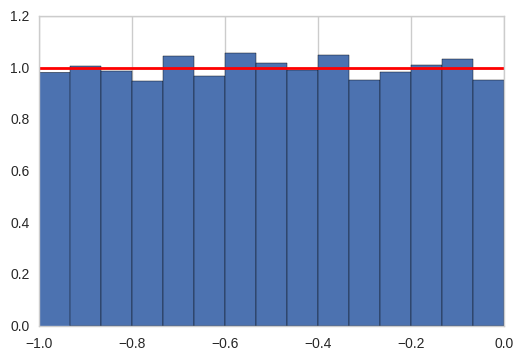

In [7]:
# 绘制样本直方图及密度函数
count, bins, ignored = plt.hist(s, 15, normed=True)
plt.plot(bins, np.ones_like(bins) / (b - a), linewidth=2, color='r')
plt.show()

### 6. 指数分布 Exponential Distribution

若连续型随机变量 X 具有概率密度
$$ f(x) =\left\{
\begin{aligned}
& \frac{1}{\theta}e^{-\frac{x}{\theta}}, & x > 0, \\
& 0, & 其它 \\
\end{aligned}
\right.
$$
其中$\theta > 0$为常数，则称 X 服从参数为$\theta$的指数分布。

**numpy.random.exponential**函数可以根据均匀分布进行抽样：

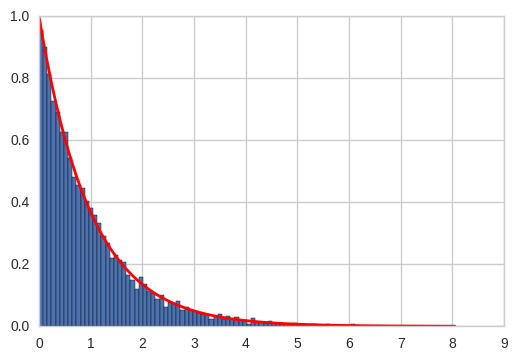

In [8]:
# 取theta = 1，绘制样本直方图及密度函数
theta = 1
f = lambda x: math.e ** (-x / theta) / theta

s = np.random.exponential(theta, 10000)
count, bins, ignored = plt.hist(s, 100, normed=True)
plt.plot(bins, f(bins), linewidth=2, color='r')
plt.show()

### 7. 正态分布 Normal Distribution